In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv("perrin-freres-monthly-champagne-.csv")
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [3]:
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [4]:
df.isnull().sum()

Month    1
Sales    2
dtype: int64

In [5]:
df.tail()

,Month,Sales
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [6]:
df.drop([105,106],axis=0,inplace=True)

In [7]:
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [8]:
df.isnull().sum()

Month    0
Sales    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   105 non-null    object 
 1   Sales   105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.5+ KB


In [10]:
df["Month"]=pd.to_datetime(df["Month"])
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [11]:
df=df.set_index("Month")

In [12]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


<AxesSubplot:xlabel='Month'>

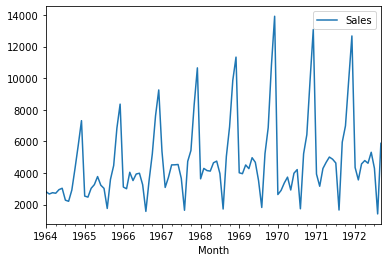

In [13]:
#it is a seasonal pattern we have to convert to stationary
df.plot()

In [14]:
#checking for stationarity
from statsmodels.tsa.stattools import adfuller

In [15]:
#Ho: It is non stationary
#H1: It is stationary

def adf(sales):
    result=adfuller(sales)
    print("adf statistics",result[0])
    print("p_value",result[1])
    print("number of lags",result[2])
    print("num of observation used for adf regression",result[3])
    print("crictical values",result[4])
    if result[1]<=0.05:
        print("strongly evedience of alternate hypothesis reject null hypothesis and accept alternate hypothesis,it is sationary")
    else:
        print("strongly evedience of null hypothesis reject alternate hypothesis and accept null hypothesis,it is not a stationary")

In [16]:
adf(df["Sales"])

adf statistics -1.8335930563276175
p_value 0.3639157716602477
number of lags 11
num of observation used for adf regression 93
crictical values {'1%': -3.502704609582561, '5%': -2.8931578098779522, '10%': -2.583636712914788}
strongly evedience of null hypothesis reject alternate hypothesis and accept null hypothesis,it is not a stationary


In [17]:
#diffrencing
df["Sales first diffrence"]=df["Sales"]-df["Sales"].shift(1)

In [18]:
df["Sales first diffrence"]

Month
1964-01-01       NaN
1964-02-01    -143.0
1964-03-01      83.0
1964-04-01     -34.0
1964-05-01     225.0
               ...  
1972-05-01    -170.0
1972-06-01     694.0
1972-07-01   -1014.0
1972-08-01   -2885.0
1972-09-01    4464.0
Name: Sales first diffrence, Length: 105, dtype: float64

In [19]:
df["Seasonal first diffrence"]=df["Sales"]-df["Sales"].shift(12)

In [20]:
df["Seasonal first diffrence"].head(14)

Month
1964-01-01      NaN
1964-02-01      NaN
1964-03-01      NaN
1964-04-01      NaN
1964-05-01      NaN
1964-06-01      NaN
1964-07-01      NaN
1964-08-01      NaN
1964-09-01      NaN
1964-10-01      NaN
1964-11-01      NaN
1964-12-01      NaN
1965-01-01   -274.0
1965-02-01   -197.0
Name: Seasonal first diffrence, dtype: float64

In [21]:
adf(df["Seasonal first diffrence"].dropna())

adf statistics -7.626619157213164
p_value 2.060579696813685e-11
number of lags 0
num of observation used for adf regression 92
crictical values {'1%': -3.503514579651927, '5%': -2.893507960466837, '10%': -2.583823615311909}
strongly evedience of alternate hypothesis reject null hypothesis and accept alternate hypothesis,it is sationary


<AxesSubplot:xlabel='Month'>

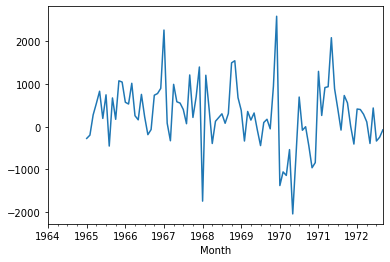

In [22]:
df["Seasonal first diffrence"].plot()

In [23]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

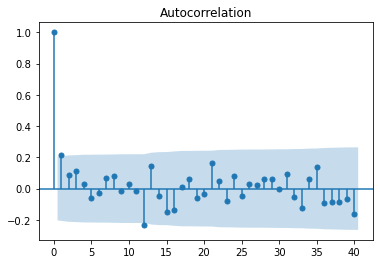

In [24]:

acf12=plot_acf(df["Seasonal first diffrence"].dropna(),lags=40)

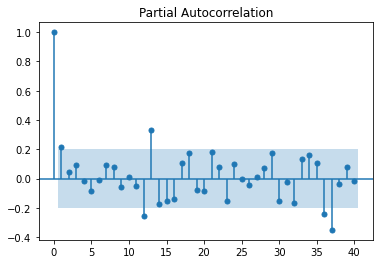

In [25]:
pacf12=plot_pacf(df["Seasonal first diffrence"].dropna(),lags=40)

In [26]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [27]:
model=ARIMA(df["Sales"],order=(1,1,1))
model_fit=model.fit()

C:\Users\Ashutosh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Ashutosh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [28]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Mon, 17 Oct 2022   AIC                           1910.251
Time:                        18:12:12   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7853     12.405      1.837      0.066      -1.528      47.099
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='Month'>

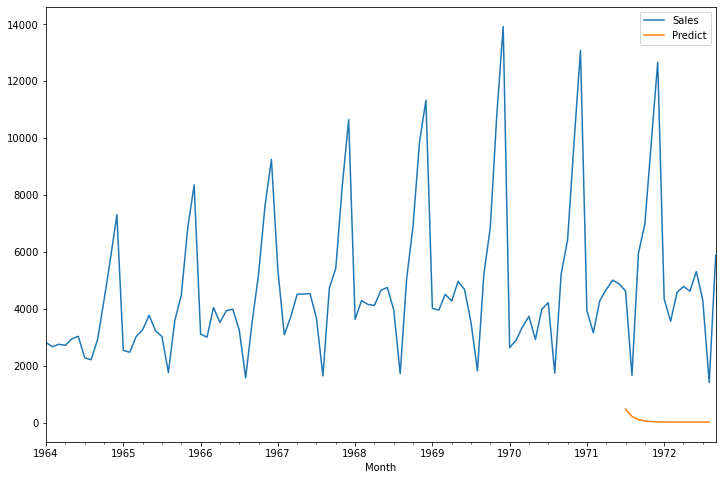

In [29]:
df["Predict"]=model_fit.predict(start=90,end=103,dynamic=True)
df[["Sales","Predict"]].plot(figsize=(12,8))

In [30]:
from statsmodels.tsa.statespace.sarimax import SARIMAX 

In [31]:
model1=SARIMAX(df["Sales"],order=(1,1,1),seasonal_order=(1,1,1,12))
model1_fit=model1.fit()

C:\Users\Ashutosh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Ashutosh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [32]:
model1_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  105
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -738.402
Date:                            Mon, 17 Oct 2022   AIC                           1486.804
Time:                                    18:12:13   BIC                           1499.413
Sample:                                01-01-1964   HQIC                          1491.893
                                     - 09-01-1972                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2790      0.081      3.433      0.001       0.120       0.438
ma.L1         -0.9494      0.043    -22.334      0.000      -1.033      -0.866
ar.S.L12      -0.4544      0.303     -1.499      0.134      -1.049       0.140
ma.S.L12       0.2450      0.311      0.788      0.431      -0.365       0.855
sigma2      5.055e+05   6.12e+04      8.265      0.000    3.86e+05    6.25e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):                 8.70
Prob(Q):                              0.61   Prob(JB):                         0.01
Heteroskedasticity (H):               1.18   Skew:                            -0.21
Prob(H) (two-sided):                  0.64   Kurtosis:                         4.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Month'>

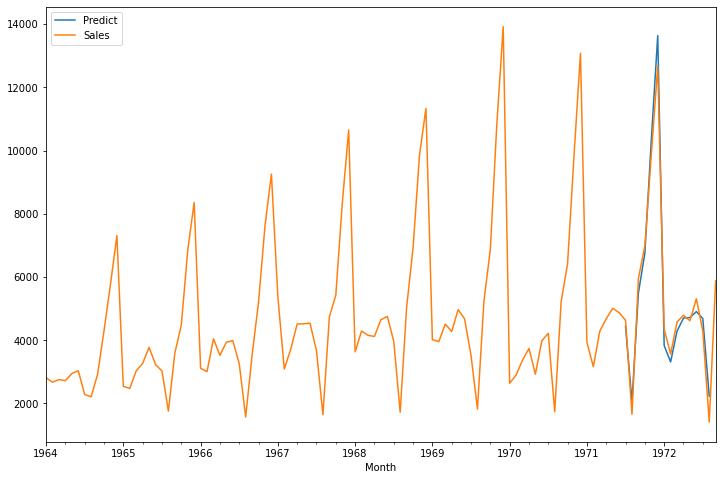

In [34]:
df["Predict"]=model1_fit.predict(start=90,end=103,dynamic=True)
df[["Predict","Sales"]].plot(figsize=(12,8))

In [35]:
from pandas.tseries.offsets import DateOffset

In [36]:
future_date=[df.index[-1]+ DateOffset(months=x) for x in range(0,24)]

In [37]:
future_df=pd.DataFrame(index=future_date[1:],columns=df.columns)

In [38]:
future_df.tail()

,Sales,Sales first diffrence,Seasonal first diffrence,Predict
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [39]:
future_predict=pd.concat([df,future_df])

In [43]:
future_predict.head()

,Sales,Sales first diffrence,Seasonal first diffrence,Predict
1964-01-01,2815.0,NaN,NaN,NaN
1964-02-01,2672.0,-143.0,NaN,NaN
1964-03-01,2755.0,83.0,NaN,NaN
1964-04-01,2721.0,-34.0,NaN,NaN
1964-05-01,2946.0,225.0,NaN,NaN


<AxesSubplot:>

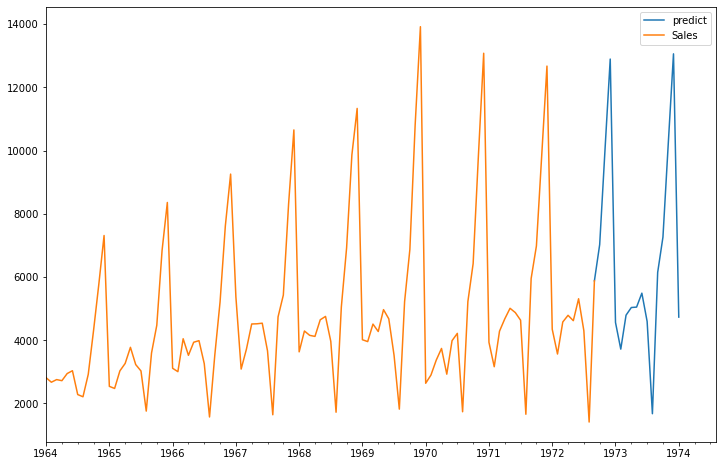

In [44]:
future_predict["predict"]=model1_fit.predict(start=104,end=120,dynamic=True)
future_predict[["predict","Sales"]].plot(figsize=(12,8))